# Demo:  Gradient Descent 

* Implement Back-tracking Line Search using Armijo Rule for adaptive learning rate algorithm
* Implement Ridge Regression with L2 penalization 
* Implement Lasso Regression with L1 penalization
* Implement Elastic Net combining both Ridge and Lasso

## Back-tracking Line Search

Since gradient descent is sensitive to the step size, we adaptive step-size using the Armijo rule in class.

In [18]:
def grad_opt_adapt(feval, winit, nit=1000, lr_init=1e-3):
    """
    Gradient descent optimization with adaptive step size
    
    feval:  A function that returns f, fgrad, the objective
            function and its gradient
    winit:  Initial estimate
    nit:    Number of iterations
    lr:     Initial learning rate
    """
    
    # Set initial point
    w0 = winit
    f0, fgrad0 = feval(w0)
    lr = lr_init
    
    # Create history dictionary for tracking progress per iteration.
    # This isn't necessary if you just want the final answer, but it 
    # is useful for debugging
    hist = {'lr': [], 'w': [], 'f': []}

    for it in range(nit):

        # Take a gradient step
        w1 = w0 - lr*fgrad0

        # Evaluate the test point by computing the objective function, f1,
        # at the test point and the predicted decrease, df_est
        f1, fgrad1 = feval(w1)
        df_est = fgrad0.dot(w1-w0)
        
        # Check if test point passes the Armijo condition
        alpha = 0.5
        if (f1-f0 < alpha*df_est) and (f1 < f0):
            # If descent is sufficient, accept the point and increase the
            # learning rate
            lr = lr*2
            f0 = f1
            fgrad0 = fgrad1
            w0 = w1
        else:
            # Otherwise, decrease the learning rate
            lr = lr/2            
            
        # Save history
        hist['f'].append(f0)
        hist['lr'].append(lr)
        hist['w'].append(w0)

    # Convert to numpy arrays
    for elem in ('f', 'lr', 'w'):
        hist[elem] = np.array(hist[elem])
    return w0, f0, hist


We can now run the new optimizer.

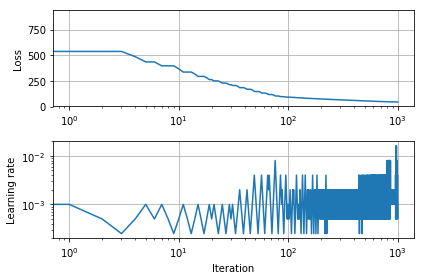

In [19]:
winit = np.random.randn(p)
nit = 1000
w, f0, hist = grad_opt_adapt(feval, winit, nit=nit)

t = np.arange(nit)
plt.subplot(2,1,1)
plt.semilogx(t, hist['f'])
plt.grid()
plt.ylabel('Loss')

plt.subplot(2,1,2)
plt.loglog(t, hist['lr'])
plt.grid()
plt.ylabel('Learning rate')
plt.xlabel('Iteration')

plt.tight_layout()

Finally we measure the accuracy.

In [20]:
yhat = predict(Xts,w)
acc = np.mean(yhat == yts)
print("Test accuracy = %f" % acc)

Test accuracy = 0.989399
